<a href="https://colab.research.google.com/github/amaziarczyk/Mniejsze_projekty/blob/master/Deep_learning/Zbi%C3%B3r_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:

import numpy as np
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy


from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt



In [2]:
#załadowanie zbioru mnist
from tensorflow.keras.datasets import mnist

In [3]:
#przypisanie danych
(x_train, y_train), (x_test, y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#sprawdzenie jak wygląda zmienna
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
##Sprawdzenie kształtu danych
print(f"Kształt zbioru treningowego:{x_train.shape}")
print(f"Kształt zbioru testowego:{x_test.shape}")
print(f"Klasy:{np.unique(y_train)}")

Kształt zbioru treningowego:(60000, 28, 28)
Kształt zbioru testowego:(10000, 28, 28)
Klasy:[0 1 2 3 4 5 6 7 8 9]


In [6]:
#liczebność klas -treningowy zbiór
classes, counts=np.unique(y_train, return_counts=True)
#liczebność klas-testowy zbiór
clas, count=np.unique(y_test, return_counts=True)

#wykres
fig = make_subplots(rows=1, cols=2)

fig.add_trace(
    go.Bar(x=classes, y=counts, name='y_train' ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=clas, y=count,name='y_test'),
    row=1, col=2
)

fig.update_xaxes(title_text="Klasa", row=1, col=1)
fig.update_xaxes(title_text="Klasa", row=1, col=2)

fig.update_layout(height=400, width=1200, title_text="Liczebność", )

fig.show()

Zbiór treningowy i testowy jest zbalansowany, brak wyrórzniającej się klasy pod względem licznośći.

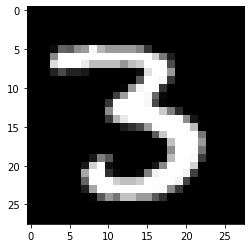

Na zdjęciu jest: 3


In [7]:
#podgląd zdjęcia (I sposób)
n=12
zdjecie=x_train[n]
plt.imshow(zdjecie)
plt.gray()
plt.show()
print("Na zdjęciu jest:", y_train[n])

Na zdjęciu jest: 3


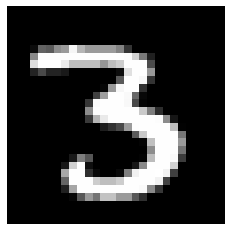

In [8]:
#podgląd zdjęcia (II sposób)
#@title Wybierz indeks zdjęcia:

#budowa slidera
n = 12 #@param {type:'slider', min:0, max:60000}

zdjecie=x_train[n]

plt.figure(figsize=(4, 4))
plt.imshow(zdjecie)
plt.axis(False)
print("Na zdjęciu jest:", y_train[n])

### Normalizacja

In [9]:
x_train,x_test=x_train/255, x_test/255

In [10]:
print(f"Zbior treningowy:\n Wartość najmniejsza: {x_train.min()}\n Wartość największa: {x_train.max()}\n")
print(f"Zbior testowy:\n Wartość najmniejsza: {x_test.min()}\n Wartość największa: {x_test.max()}\n")

Zbior treningowy:
 Wartość najmniejsza: 0.0
 Wartość największa: 1.0

Zbior testowy:
 Wartość najmniejsza: 0.0
 Wartość największa: 1.0



### One Hot Encoder() 
Problem jest problemem klasyfikacji zatem koduje poszczególne numery etykiet

In [11]:
print("Kształt etykiet zbiory treningowego to: ",y_train.shape)
print("Kształt etykiet zbioru testowego to: ",y_test.shape)

Kształt etykiet zbiory treningowego to:  (60000,)
Kształt etykiet zbioru testowego to:  (10000,)


In [12]:
#Należy zmienić kształt rozszerzając o jeden wymiar
y_train, y_test=y_train.reshape(-1,1), y_test.reshape(-1,1)

print("Kształt etykiet zbiory treningowego po zmianie to: ",y_train.shape)
print("Kształt etykiet zbioru testowego po zmianie to: ",y_test.shape)

Kształt etykiet zbiory treningowego po zmianie to:  (60000, 1)
Kształt etykiet zbioru testowego po zmianie to:  (10000, 1)


In [13]:
encoder=OneHotEncoder(sparse=False)

In [14]:
#dopasowanie enkodera do zbioru treningowego
encoder=encoder.fit(y_train)

In [15]:
y_train_ohe=encoder.transform(y_train)
y_test_ohe=encoder.transform(y_test)

Po zakodowaniu mamy:[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Klasa [2]


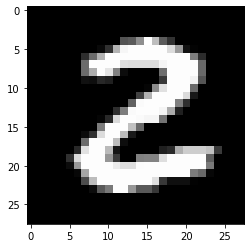

In [16]:
#sprawdzenie kodowania
i=25

print(f"Po zakodowaniu mamy:{y_train_ohe[i]}")
print(f'Klasa {y_train[i]}')

z=x_train[i]
plt.imshow(z)
plt.gray()
plt.show()

###Wydzielenie zboru walidacyjnego

In [17]:
#wydzielenie zbioru walidacyjnego
x_train, x_val, y_train_ohe, y_val_ohe= train_test_split(x_train,
                                                 y_train_ohe,
                                                 test_size=0.1,
                                                 random_state=45)

In [18]:
print(f"Zbiór treningowy: {x_train.shape[0]}")
print(f"Zbiór walidacyjny: {x_val.shape[0]}")

Zbiór treningowy: 54000
Zbiór walidacyjny: 6000


### Budowa modelu

In [19]:
def create_mnist_classifier(num, drop, lr, print_model=True):

  model=Sequential()
  model.add(layers.InputLayer(input_shape=(28,28)))
  model.add(layers.Reshape((784,)))

  for i in num:
     model.add(layers.Dense(units=i, activation='relu', use_bias=True))
     model.add(layers.Dropout(drop))


  model.add(layers.Dense(units=10, activation='softmax', use_bias=True))

  #drukowane modelu
  if print_model:
    print(model.summary())

  
  #kompilujemy model
  model.compile(optimizer=optimizers.Adam(learning_rate=lr),
                loss=losses.CategoricalCrossentropy(),
                metrics= ['accuracy'])

  return model


Tworzenie przykładowego modelu

In [20]:
tmp_model=create_mnist_classifier(
    num=[5,10,15],
    drop=0.5,
    lr=0.01
    )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 5)                 3925      
_________________________________________________________________
dropout (Dropout)            (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                60        
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 15)                165       
_________________________________________________________________
dropout_2 (Dropout)          (None, 15)                0

In [21]:
#sprawdzenie co model będzie miał na wyjściu
tmp_img=np.ones((1,28,28))
tmp_output=tmp_model.predict(tmp_img)
tmp_output

array([[0.10211008, 0.07572196, 0.10849144, 0.07392223, 0.12542588,
        0.12005158, 0.07083019, 0.1842672 , 0.0615437 , 0.07763568]],
      dtype=float32)

In [22]:
tmp_output.sum()

0.9999999

In [23]:
tmp_output.shape

(1, 10)

In [24]:
#usuwamy model aby zwolnić pamięć
del tmp_model

### Trening i walidacja

In [25]:
# tworzę prosty model
model_simple=create_mnist_classifier(
    num=[8,16,32],
    drop=0.0,
    lr=0.01
    )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 16)                144       
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)               

In [26]:
x_train.shape[0]

54000

In [27]:
len(y_train_ohe)

54000

In [28]:
#trening
history=model_simple.fit(
    x=x_train,
    y=y_train_ohe,
    batch_size=200,
    epochs=50,
    validation_data=(x_val,y_val_ohe)
)

Epoch 1/50
270/270 [==============================] - 2s 4ms/step - loss: 0.4802 - accuracy: 0.8488 - val_loss: 0.3627 - val_accuracy: 0.8923
Epoch 2/50
270/270 [==============================] - 1s 3ms/step - loss: 0.2855 - accuracy: 0.9152 - val_loss: 0.2671 - val_accuracy: 0.9193
Epoch 3/50
270/270 [==============================] - 1s 3ms/step - loss: 0.2561 - accuracy: 0.9227 - val_loss: 0.2895 - val_accuracy: 0.9145
Epoch 4/50
270/270 [==============================] - 1s 3ms/step - loss: 0.2412 - accuracy: 0.9268 - val_loss: 0.2496 - val_accuracy: 0.9250
Epoch 5/50
270/270 [==============================] - 1s 3ms/step - loss: 0.2328 - accuracy: 0.9295 - val_loss: 0.2590 - val_accuracy: 0.9203
Epoch 6/50
270/270 [==============================] - 1s 3ms/step - loss: 0.2264 - accuracy: 0.9294 - val_loss: 0.2500 - val_accuracy: 0.9258
Epoch 7/50
270/270 [==============================] - 1s 3ms/step - loss: 0.2166 - accuracy: 0.9335 - val_loss: 0.2613 - val_accuracy: 0.9238
Epoch 

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

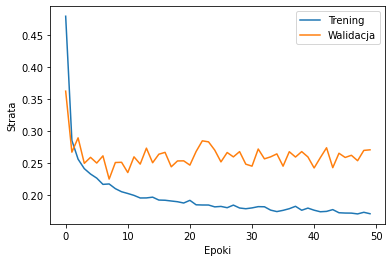

In [30]:
#wykres błędu
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epoki")
plt.ylabel("Strata")
plt.legend(["Trening","Walidacja"])
plt.show()

Na zbiorze spada, od 10 epoki model się więcej nie nauczył, przeuczenie.

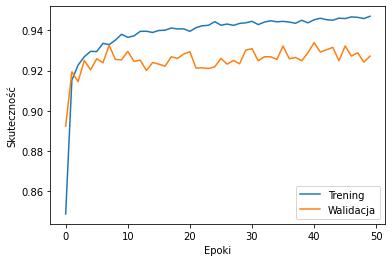

In [31]:
#wykres skuteczności
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epoki")
plt.ylabel("Skuteczność")
plt.legend(["Trening","Walidacja"])
plt.show()

In [32]:
#wykres
fig = make_subplots(rows=1, cols=2)

##strata
fig.add_trace(
    go.Scatter(y=history.history["loss"], name='Trening' ),row=1, col=1 
    )
fig.add_trace(
    go.Scatter(y=history.history["val_loss"], name='Walidacja' ),row=1, col=1
    )

##skuteczność
fig.add_trace(
    go.Scatter( y=history.history["accuracy"],name='Trening'),
    row=1, col=2
    )
fig.add_trace(
    go.Scatter(y=history.history["val_accuracy"],name='Walidacja'),
    row=1, col=2
)

fig.update_xaxes(title_text="Epoka-Strata", row=1, col=1)
fig.update_xaxes(title_text="Epoka-Skuteczność", row=1, col=2)


fig.update_layout(height=400, width=1200)

fig.show()

### Predykcja

In [33]:
#predykcja na zbiorze treningowym
y_train_ohe_pred=model_simple.predict(
    x=x_train,
    batch_size=200
)

#buduję macierz konfuzji w celu sprawdzenia pomyłek
cm=confusion_matrix(
    y_true=np.argmax(y_train_ohe, axis=1),
    y_pred=np.argmax(y_train_ohe_pred, axis=1)
)
cm

array([[5120,    2,   18,    4,   10,   38,   61,    0,   73,    2],
       [   2, 5881,   25,   20,    5,   14,   11,   19,   73,    7],
       [  11,   10, 5074,   37,   33,    8,   27,   83,   68,    3],
       [  12,   16,   89, 5092,    2,   95,    6,   65,  130,   27],
       [   9,    0,   21,    4, 5113,   12,   59,   11,   13,   52],
       [  19,    6,   11,  133,   13, 4503,   56,   12,   93,   42],
       [  20,    2,    6,    0,   29,   30, 5235,    0,   21,    0],
       [   8,   10,   22,    5,   41,    7,    0, 5500,   15,   24],
       [  13,   31,   33,   20,    7,   51,   37,    9, 5015,   11],
       [  14,    5,    4,   24,  269,   35,    2,   70,  123, 4797]])

In [34]:
##predykcja na zbiorze walidacyjnym
y_val_ohe_pred=model_simple.predict(
    x=x_val,
    batch_size=200
)

#buduję macierz konfuzji w celu sprawdzenia pomyłek
cm_val=confusion_matrix(
    y_true=np.argmax(y_val_ohe, axis=1),
    y_pred=np.argmax(y_val_ohe_pred, axis=1)
)
cm_val

array([[566,   0,   6,   2,   1,   7,   3,   1,   8,   1],
       [  1, 653,   9,   2,   0,   4,   2,   4,  10,   0],
       [  4,   3, 544,   9,   5,   0,   5,  14,  20,   0],
       [  2,   1,  13, 529,   0,  12,   0,  10,  22,   8],
       [  1,   2,   6,   1, 511,   2,   6,   4,   5,  10],
       [  0,   0,   3,  21,   1, 482,   7,   0,  11,   8],
       [  2,   0,   1,   0,   3,  10, 558,   0,   1,   0],
       [  1,   3,   4,   2,   5,   2,   0, 605,   2,   9],
       [  0,   4,   4,   4,   0,  10,   3,   2, 588,   9],
       [  1,   2,   2,   3,  40,   4,   1,  15,  11, 527]])

### Analiza jakościowa

In [35]:
def plot_results(results, experiment_name, hiperparameter_vals):
  
  #macierz wykresów
  fig,ax=plt.subplots(
      nrows=4,
      ncols=1,
      figsize=(25,25),
      sharex=True
  )

  tmp_best_acc=0.0
  best_model=""

  #wszystkie wykresy
  for i in range(len(results)):
    ax[0].plot(results[i].history["loss"])
    ax[1].plot(results[i].history["accuracy"])
    ax[2].plot(results[i].history["val_loss"])
    ax[3].plot(results[i].history["val_accuracy"])
    tmp_acc=max(results[i].history['val_accuracy'])
    if tmp_acc>tmp_best_acc:
      tmp_best_acc=tmp_acc
      best_model=list(hiperparameter_vals.keys())[i]

    #dodajemy nazwy osi
  ax[0].set_ylabel("loss")
  ax[0].set_title("experiment: "+experiment_name+ "metric: loss")
  ax[1].set_ylabel("accuracy")
  ax[1].set_title("accuracy")
  ax[2].set_ylabel("val_loss")
  ax[2].set_title("val_loss")
  ax[3].set_ylabel("val_accuracy")
  ax[3].set_title(f"val_accuracy, best model:{best_model}, val: {tmp_best_acc:.2}")
  ax[0].legend(list(hiperparameter_vals.keys()))
  ax[3].set_xlabel("Epochs")
  plt.show()



####Zmiana wielkości modelu

In [36]:
#stałe wartości
fixed_epochs=40
fixed_lr=0.01
fixed_drop=0.00
fixed_batch_size=200

In [37]:
model_sizes={
    "very_small":[8,16],
    "small":[8,16,32],
    "medium":[16,32,64],
    "big":[16,32,64,128],
    "very_big":[8,16,32,64,128,256]
}

In [38]:
results=[]
models=[]

In [48]:
for key in model_sizes:
  tmp_model=create_mnist_classifier(
    num=model_sizes[key],
    drop=fixed_drop,
    lr=fixed_lr
    )
  tmp_result=tmp_model.fit(
      x=x_train,
      y=y_train_ohe,
      batch_size=fixed_batch_size,
      epochs=fixed_epochs,
      validation_data=(x_val,y_val_ohe),
      verbose=0
  )
  results.append(tmp_result)
  models.append(tmp_model)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_7 (Reshape)          (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 8)                 6280      
_________________________________________________________________
dropout_24 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_32 (Dense)             (None, 16)                144       
_________________________________________________________________
dropout_25 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                170       
Total params: 6,594
Trainable params: 6,594
Non-trainable params: 0
____________________________________________________

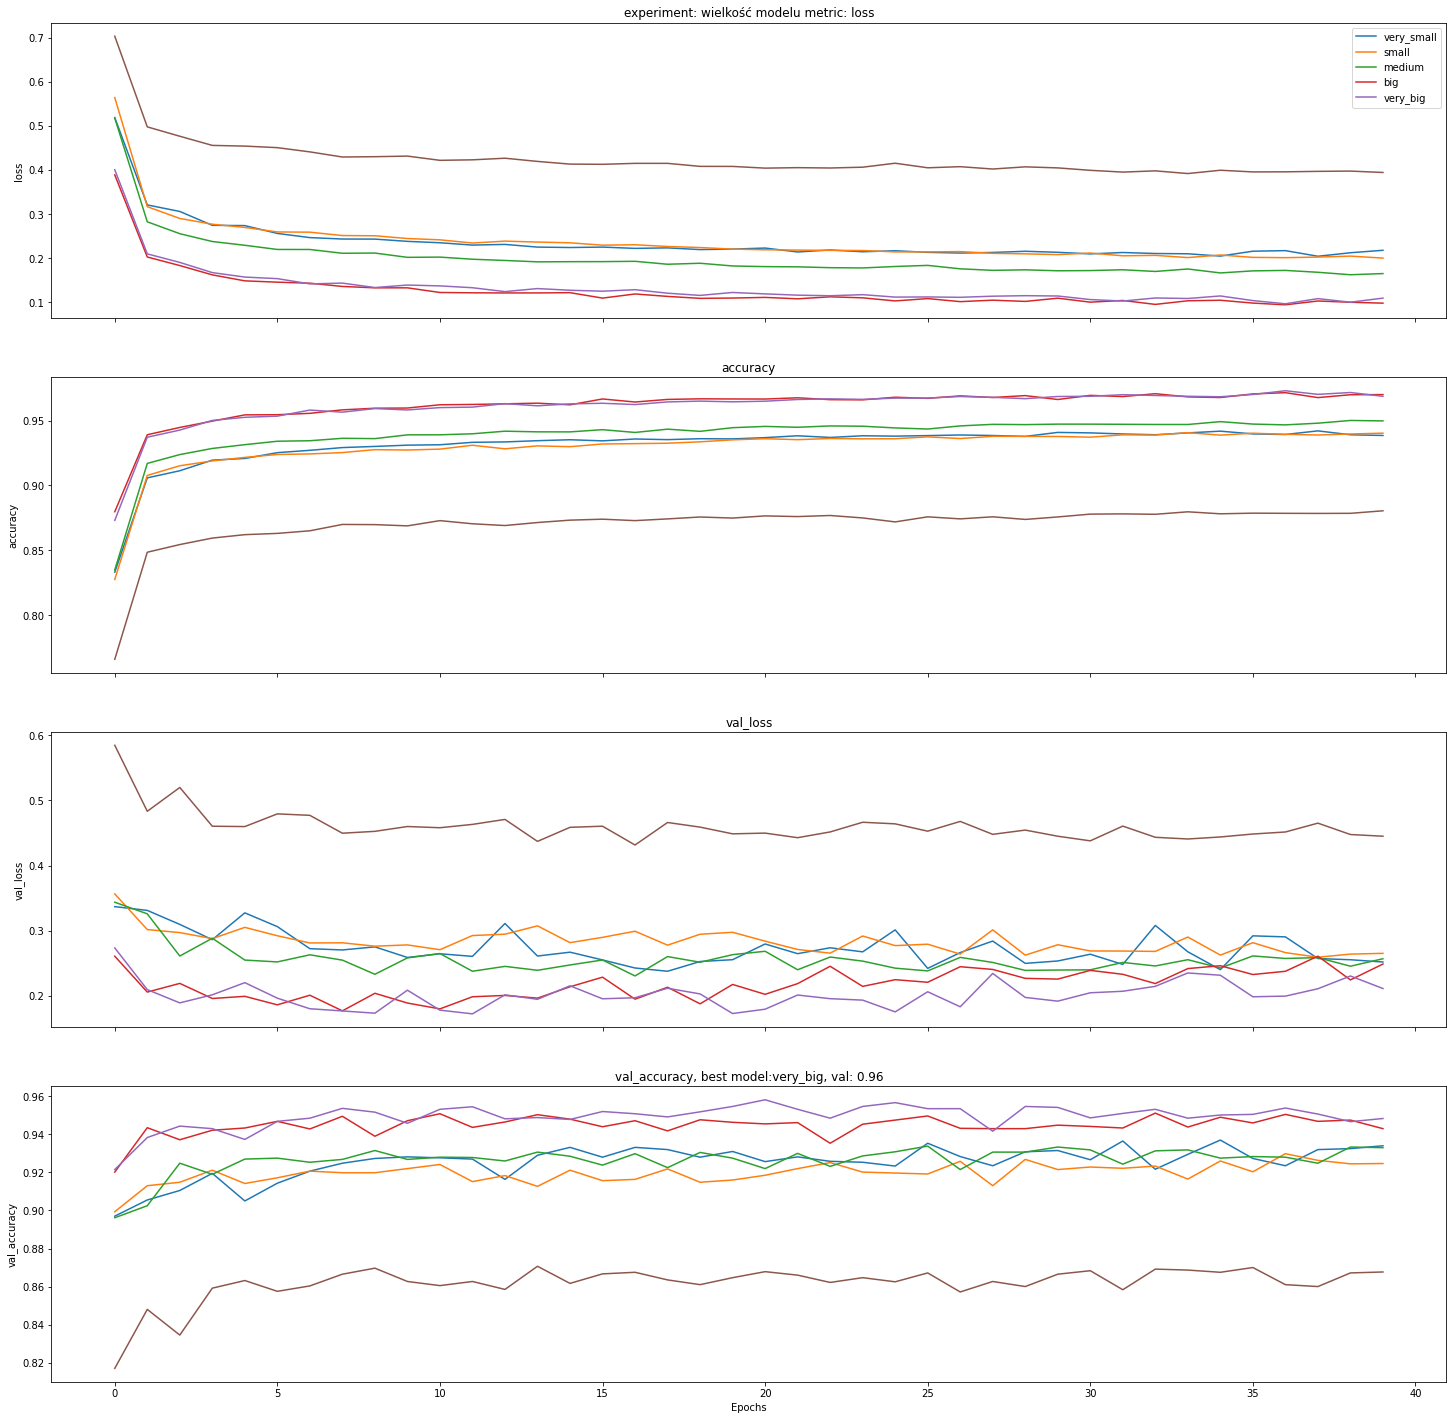

In [49]:
#porównanie modeli
experiment_type='wielkość modelu '

plot_results(
    results=results,
    experiment_name=experiment_type,
    hiperparameter_vals=model_sizes
)

####Zmiana learning rate

In [50]:
#stałe wartości
fixed_epochs=40
fixed_drop=0.00
fixed_batch_size=200
fixed_model_size=[16,32,64]

In [51]:
lr_vals={
    "0.001":0.001,
    "0.01":0.01,
    "0.1":0.1,
    "1":1,
    "10":10
}

In [52]:
results=[]
models=[]

In [53]:
for key in lr_vals:
  tmp_model=create_mnist_classifier(
    num=fixed_model_size,
    drop=fixed_drop,
    lr=lr_vals[key]
    )
  tmp_result=tmp_model.fit(
      x=x_train,
      y=y_train_ohe,
      batch_size=fixed_batch_size,
      epochs=fixed_epochs,
      validation_data=(x_val,y_val_ohe),
      verbose=0
  )
  results.append(tmp_result)
  models.append(tmp_model)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_12 (Reshape)         (None, 784)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 16)                12560     
_________________________________________________________________
dropout_42 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_55 (Dense)             (None, 32)                544       
_________________________________________________________________
dropout_43 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_56 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_44 (Dropout)         (None, 64)              

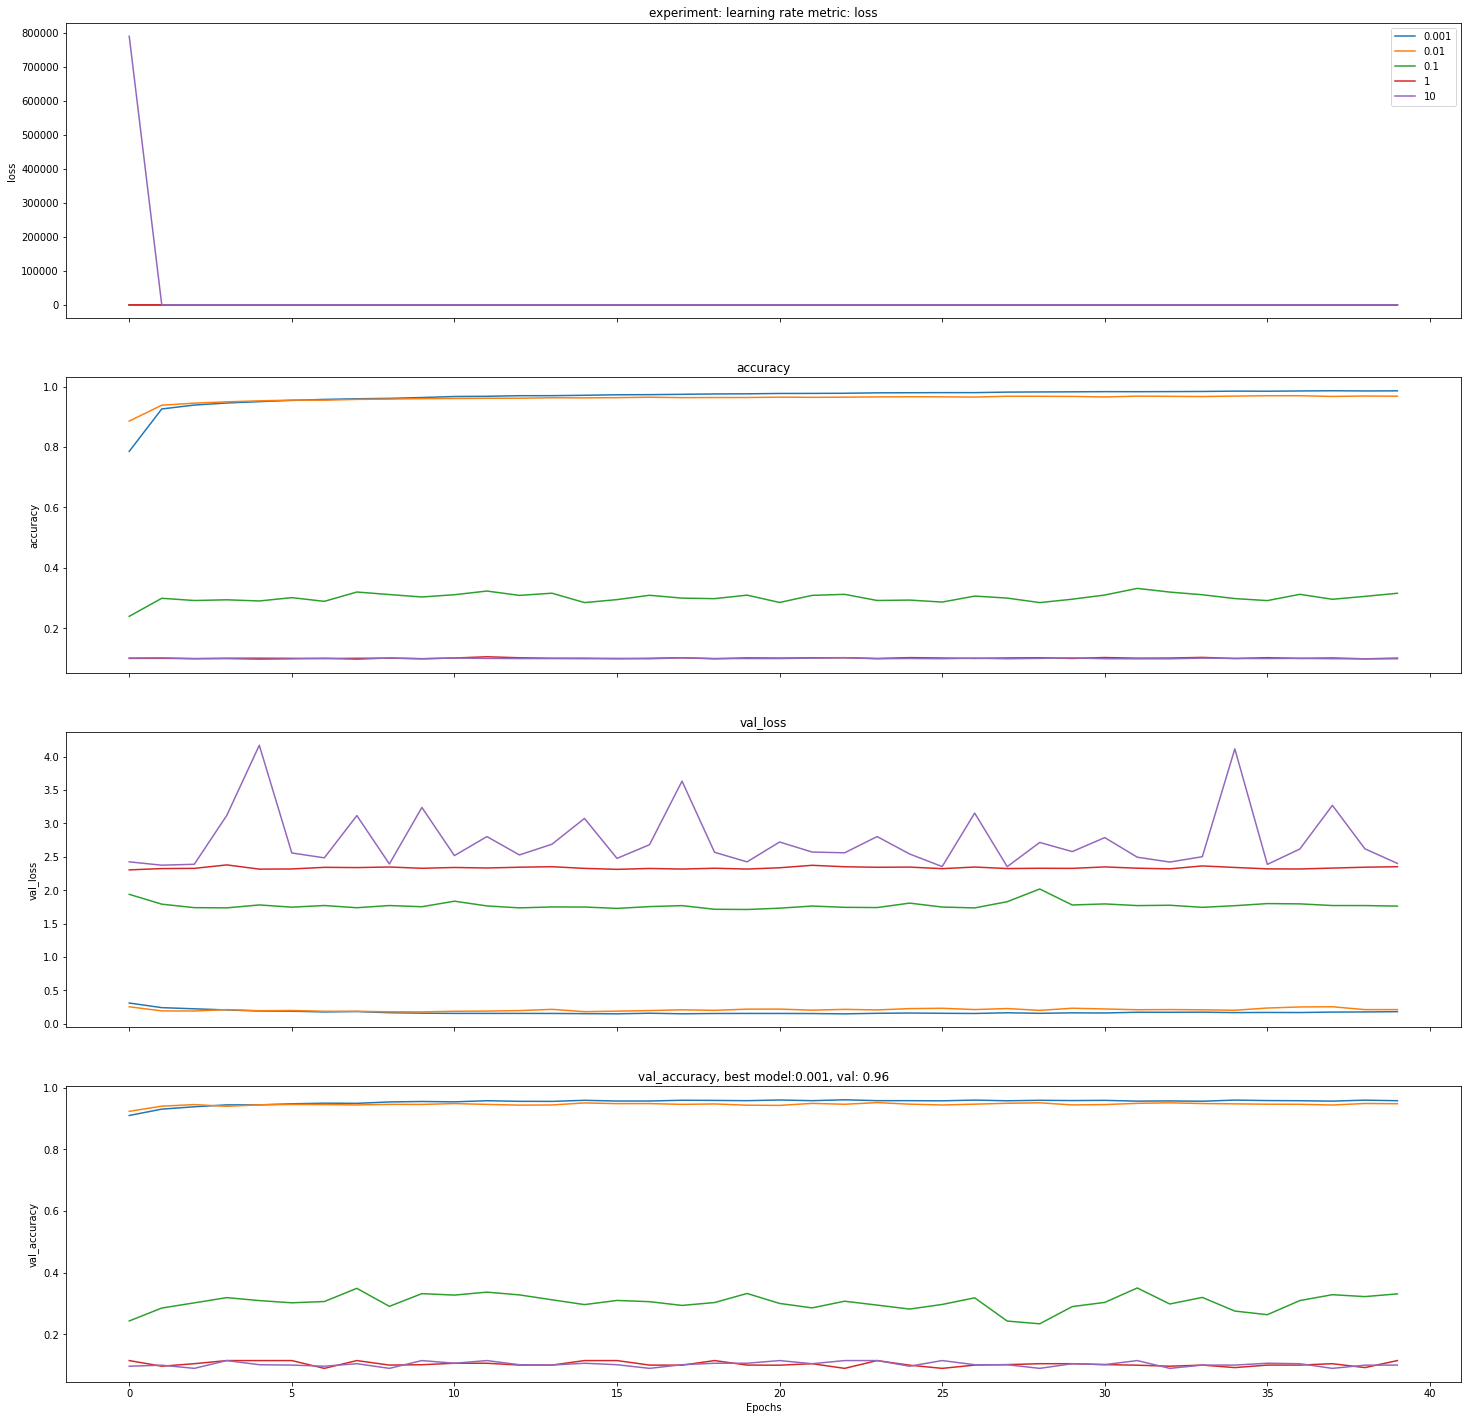

In [54]:
#porównanie modeli
experiment_type='learning rate '

plot_results(
    results=results,
    experiment_name=experiment_type,
    hiperparameter_vals=lr_vals
)

####Zmiana wartości dropout

In [59]:
#stałe wartości
fixed_epochs=40
fixed_lr=0.01
fixed_batch_size=200
fixed_model_size=[32,64,128,256]

drop_vals={
    "0.2":0.2,
    "0.4":0.4,
    "0.6":0.6,
}

results=[]
models=[]

In [ ]:
results=[]
models=[]

In [60]:
for key in drop_vals:
  tmp_model=create_mnist_classifier(
    num=fixed_model_size,
    drop=drop_vals[key],
    lr=fixed_lr,
    print_model=False
    )
  tmp_result=tmp_model.fit(
      x=x_train,
      y=y_train_ohe,
      batch_size=fixed_batch_size,
      epochs=fixed_epochs,
      validation_data=(x_val,y_val_ohe),
      verbose=0
  )
  results.append(tmp_result)
  models.append(tmp_model)

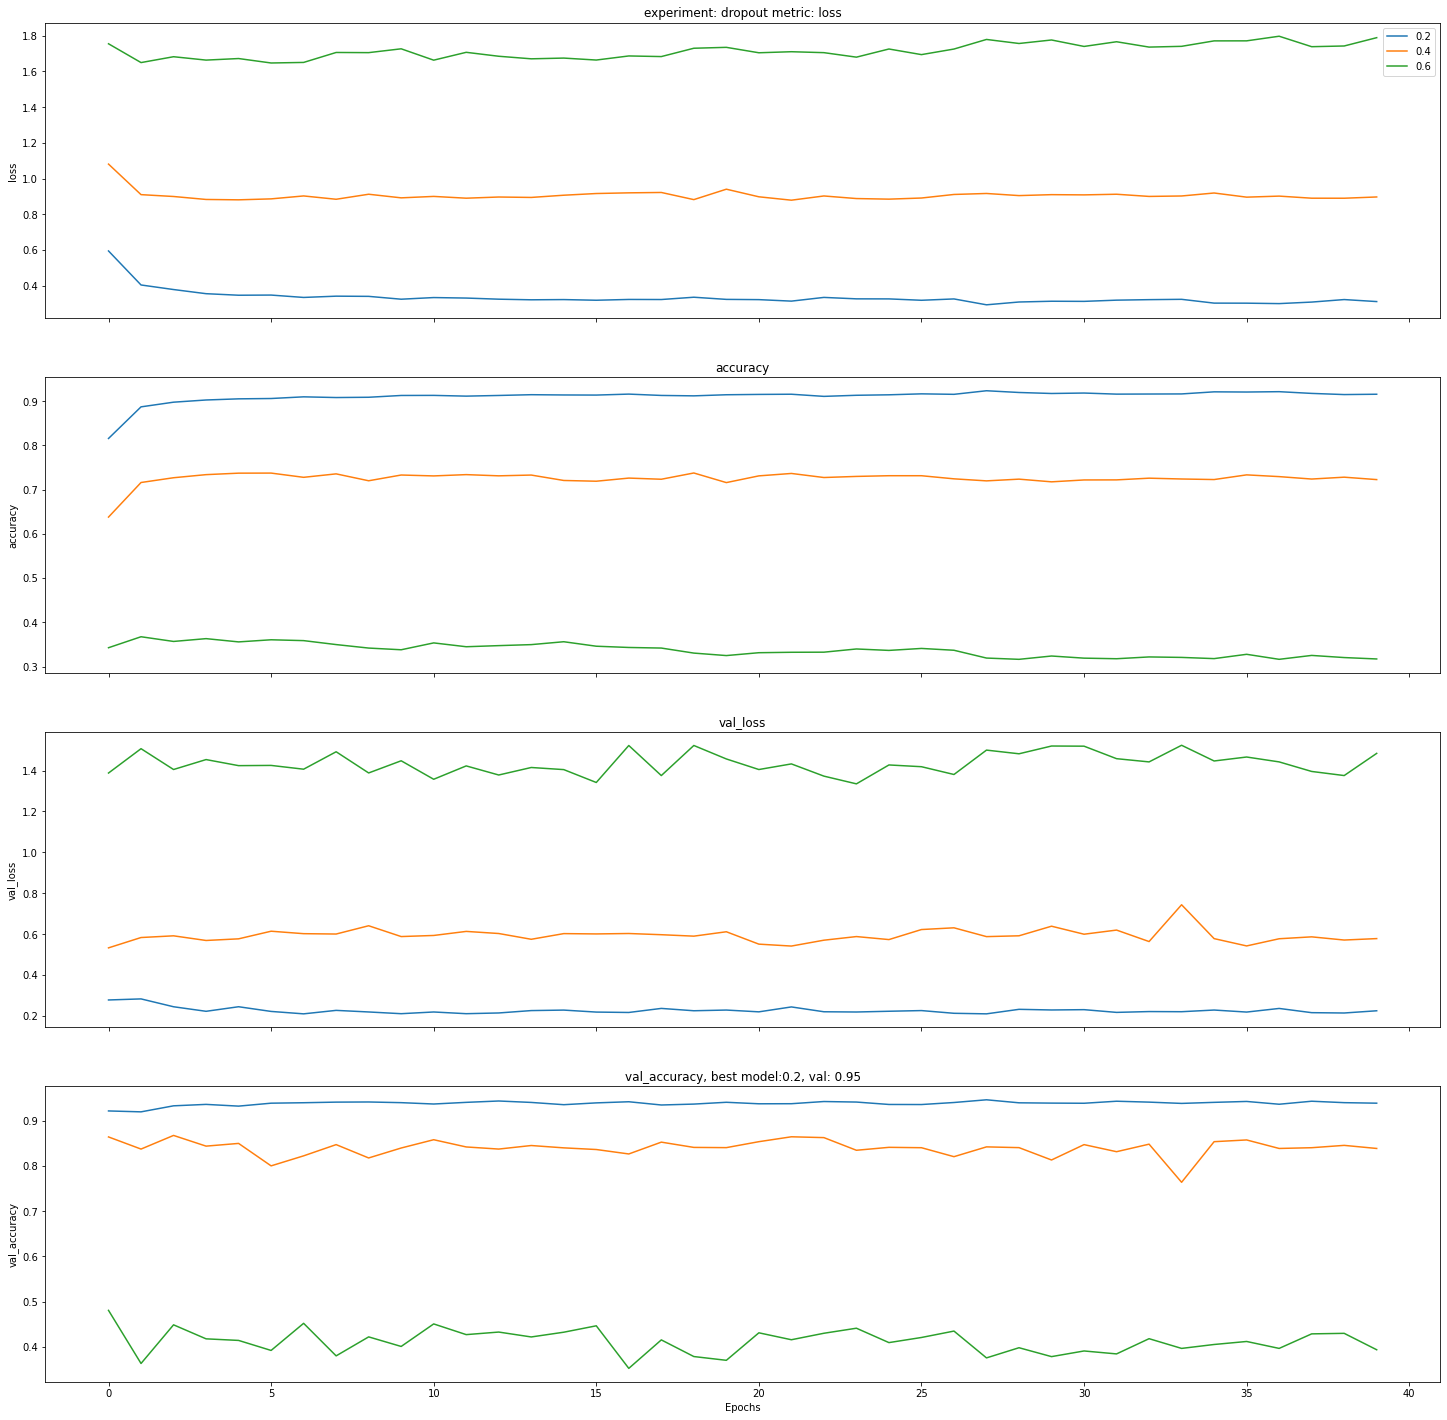

In [61]:
#porównanie modeli
experiment_type='dropout '

plot_results(
    results=results,
    experiment_name=experiment_type,
    hiperparameter_vals=drop_vals
)

###Test najlepszego modelu

In [64]:
#wybranie najlepszego modelu
best_model=models[0]


In [65]:
#predykcja danych testowych
y_test_ohe_pred=best_model.predict(
    x=x_test,
    batch_size=200
)

In [68]:
#przejście z one hot na klasy
y_test_pred=encoder.inverse_transform(y_test_ohe_pred)

In [72]:
#metryki jakościowe
print(f'Najlepszy model testowy \n dopasowanie:{accuracy_score(y_test, y_test_pred)}')

Najlepszy model testowy 
 dopasowanie:0.9469


In [73]:
#macierz pomyłek
cm=confusion_matrix(
    y_true=y_test,
    y_pred=y_test_pred
)
cm

array([[ 965,    0,    1,    0,    1,    2,    6,    3,    2,    0],
       [   0, 1108,    3,    5,    1,    3,    1,    2,   12,    0],
       [   2,    2,  974,   12,    7,    1,    9,    9,   16,    0],
       [   0,    1,    8,  970,    2,    9,    0,   13,    3,    4],
       [   1,    0,    1,    0,  936,    0,   18,    3,    5,   18],
       [   4,    1,    1,   37,    3,  810,   15,    3,    6,   12],
       [   9,    2,    1,    0,    6,    8,  927,    0,    5,    0],
       [   2,    5,   21,    1,    8,    0,    0,  982,    1,    8],
       [   6,    4,   11,    6,   23,   17,   16,    6,  874,   11],
       [   3,    6,    0,   16,   36,    6,    1,   13,    5,  923]])